## 1.模型不同粒度剪枝实践

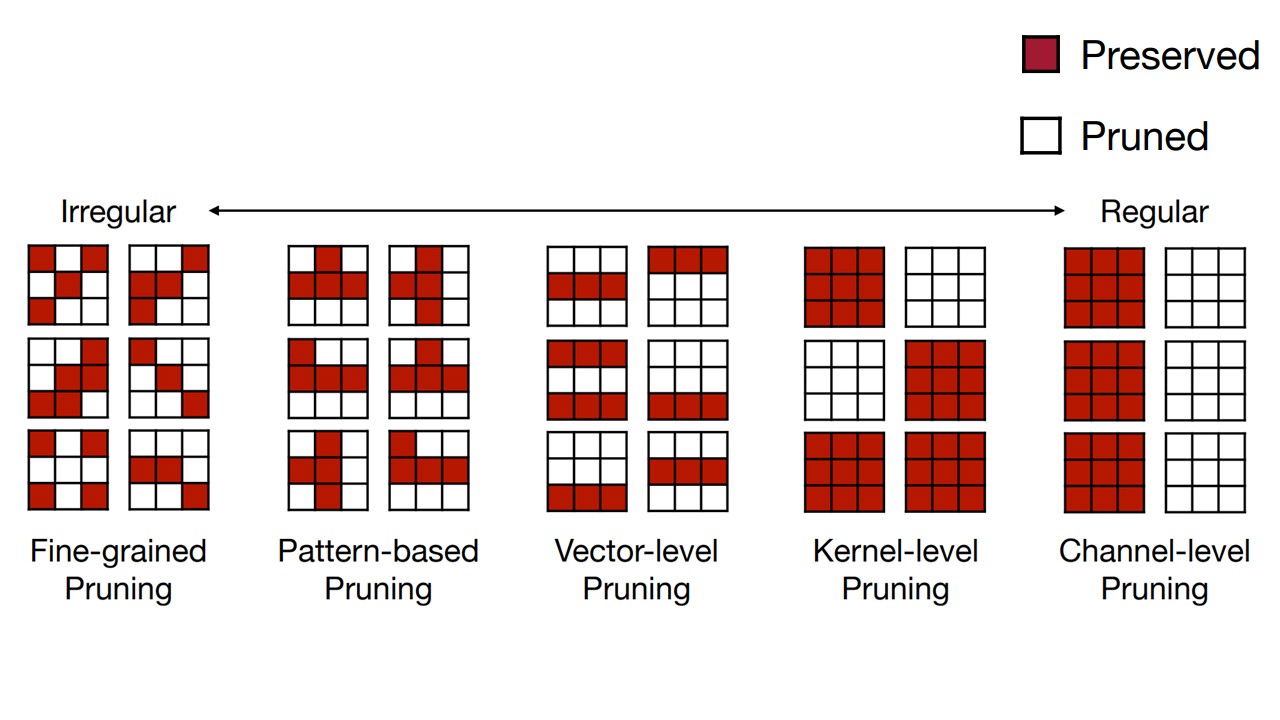

按照剪枝粒度进行划分，剪枝分为非结构化剪枝和结构化剪枝。
- 非结构化剪枝：修剪参数的单个元素。
- 结构化剪枝：有选择性地移除网络的较大部分，比如一层或一个通道。

In [29]:
import torch
from matplotlib import pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 解决中文乱码

In [27]:
# 创建一个可视化2维矩阵函数，将值为0的元素与其他区分开
def plot_matrix(tensor, title):
    # 创建一个新的图像和轴
    fig, ax = plt.subplots()
    
    # 使用 CPU 上的数据，转换为 numpy 数组，并检查相等条件，设置颜色映射
    ax.imshow(tensor.cpu().numpy() == 0, vmin=0, vmax=1, cmap='tab20c')
    ax.set_title(title)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    
    # 遍历矩阵中的每个元素并添加文本标签
    for i in range(tensor.shape[1]):
        for j in range(tensor.shape[0]):
            text = ax.text(j, i, f'{tensor[i, j].item():.2f}', ha="center", va="center", color="k")
    
    # 显示图像
    plt.show()


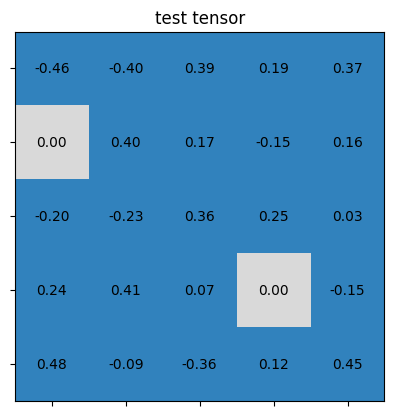

In [24]:
# 测试效果
weight=torch.tensor([[-0.46, -0.40, 0.39, 0.19, 0.37],
                            [0.00, 0.40, 0.17, -0.15, 0.16],
                            [-0.20, -0.23, 0.36, 0.25, 0.03],
                            [0.24, 0.41, 0.07, 0.00, -0.15],
                            [0.48, -0.09, -0.36, 0.12, 0.45]])
plot_matrix(test_tensor, 'weight')

## 细粒度剪枝

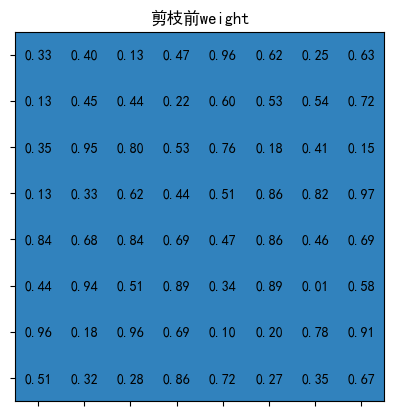

In [28]:
 # 创建一个矩阵weight
weight = torch.rand(8, 8)
plot_matrix(weight, '剪枝前weight')

现在定义一个规则，比如想要将Tensor里的值小于0.5的都置为0

In [ ]:
# 细粒度剪枝
def fine_grained_prune(tensor: torch.Tensor, threshold  : float) -> torch.Tensor:
    """
    magnitude-based pruning for single tensor
    :param tensor: torch.(cuda.)Tensor, 
    :param threshold: float, pruning threshold
    :return:
        torch.(cuda.)Tensor, mask for zeros
    """
    for i in range(tensor.shape[1]):
        for j in range(tensor.shape[0]):
            
    

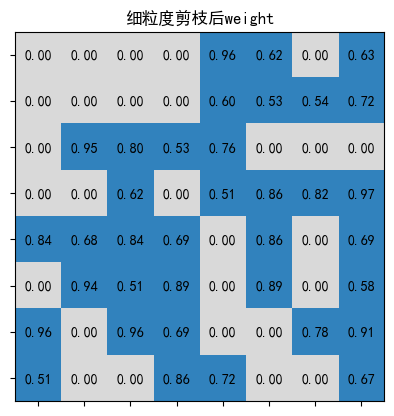

In [32]:
# 细粒度剪枝
def fine_grained_prune(tensor: torch.Tensor, threshold  : float) -> torch.Tensor:
    """
    magnitude-based pruning for single tensor
    :param tensor: torch.(cuda.)Tensor, 
    :param threshold: float, pruning threshold
    :return:
        torch.(cuda.)Tensor, mask for zeros
    """
    mask = torch.gt(tensor, threshold)
    tensor.mul_(mask)
    return tensor
pruned_weight = fine_grained_prune(weight, 0.5)
plot_matrix(weight, '细粒度剪枝后weight')

## 模式级别剪枝

## 向量级别剪枝

In [17]:
import torch 
# 创建一个矩阵weight
weight = torch.rand(3, 3)
print(f"剪枝前weight:  {weight}")

剪枝前weight:  tensor([[0.7402, 0.9403, 0.0126],
        [0.3518, 0.0941, 0.7876],
        [0.4168, 0.7522, 0.2007],
        [0.1227, 0.1093, 0.9083]])


In [18]:
# 将idx所在的行剪枝
def vector_pruning(weight, idx):
    row, col = idx
    prune_weight = weight.clone()
    prune_weight[row, :] = 0
    return prune_weight
idx = (1, 1)
prune_weight = vector_level_pruning(weight, idx)
print(f"剪枝后weight:  {prune_weight}")


剪枝后weight:  tensor([[0.7402, 0.0000, 0.0126],
        [0.0000, 0.0000, 0.0000],
        [0.4168, 0.0000, 0.2007],
        [0.1227, 0.0000, 0.9083]])


## 卷积核级别剪枝

## 通道级别剪枝